In [1]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.cluster import KMeans
from sklearn.metrics import adjusted_rand_score

In [2]:
documents = [''' 2020-04-27 19:33:38,888 [pool-37-thread-1] ERROR  2020-04-27 19:33:38,888 [pool-37-thread-1] INFO 2020-04-27 19:31:06,253 [pool-38-thread-1] DEBUG c.c.cps.generic.ipc.RemoteService - onNext called on responseHandler with code: 200  INFO | Establishing network connection from 2022-02-25T05:34:55.706132+0000   INFO | Connector stopped 2022-02-25T05:36:08.859594+0000  WARN | Could not start network bridge between: 2022-02-25T05:49:32.634769+0000 time="2022-02-25T05:49:32Z" level=error msg="Get https://10.96.0.1:443/api/v1/namespaces/kube-system/pods/maintainer-tg6pb: net/http: TLS handshake timeout" 2022-02-25T05:34:22.607738+0000 time="2022-02-25T05:34:22Z" level=info msg="Reading alerts at 2022-02-25 05:34:22"''',' java.io.IOException: java.util.concurrent.ExecutionException: java.net.SocketTimeoutException: Connect Timeout  	at java.util.concurrent.Executors$RunnableAdapter.call(Executors.java:511)  Caused by: java.util.concurrent.ExecutionException: java.net.SocketTimeoutException: Connect Timeout  	... 10 common frames omitted 2022-02-25T05:30:01.943077+0000  org.apache.activemq.transport.TransportDisposedIOException: peer stopped. ' ]

In [3]:
import numpy as np
document1 = []
document2 = []


In [4]:
import re
document1.append(re.sub(r'(?ui)\\b\\w*[a-z][^0-9a-fA-F]+\\w*\\b','',documents[0]))
document1.append(re.sub(r'(?ui)\\b\\w*[a-z][^0-9a-fA-F]+\\w*\\b','',documents[1]))

document2.append('''ERROR  INFO DEBUG c.c.cps.generic.ipc.RemoteService - onNext called on responseHandler with code:   INFO | Establishing network connection from    INFO | Connector stopped   WARN | Could not start network bridge between:  time="" level=error msg="Get https://api/v1/namespaces/kube-system/pods/maintainer-: net/http: TLS handshake timeout"  time="" level=info msg="Reading alerts at "''')
document2.append('''java.io.IOException: java.util.concurrent.ExecutionException: java.net.SocketTimeoutException: Connect Timeout  	at java.util.concurrent.Executors$RunnableAdapter.call(Executors.java:511)  Caused by: java.util.concurrent.ExecutionException: java.net.SocketTimeoutException: Connect Timeout  	... 10 common frames omitted   org.apache.activemq.transport.TransportDisposedIOException: peer stopped.  "''')

In [5]:
from sklearn.feature_extraction.text import CountVectorizer

In [55]:
document1

[' 2020-04-27 19:33:38,888 [pool-37-thread-1] ERROR  2020-04-27 19:33:38,888 [pool-37-thread-1] INFO 2020-04-27 19:31:06,253 [pool-38-thread-1] DEBUG c.c.cps.generic.ipc.RemoteService - onNext called on responseHandler with code: 200  INFO | Establishing network connection from 2022-02-25T05:34:55.706132+0000   INFO | Connector stopped 2022-02-25T05:36:08.859594+0000  WARN | Could not start network bridge between: 2022-02-25T05:49:32.634769+0000 time="2022-02-25T05:49:32Z" level=error msg="Get https://10.96.0.1:443/api/v1/namespaces/kube-system/pods/maintainer-tg6pb: net/http: TLS handshake timeout" 2022-02-25T05:34:22.607738+0000 time="2022-02-25T05:34:22Z" level=info msg="Reading alerts at 2022-02-25 05:34:22"',
 ' 2020-04-27 19:33:38,888 [pool-37-thread-1] ERROR  2020-04-27 19:33:38,888 [pool-37-thread-1] INFO 2020-04-27 19:31:06,253 [pool-38-thread-1] DEBUG c.c.cps.generic.ipc.RemoteService - onNext called on responseHandler with code: 200  INFO | Establishing network connection fr

In [107]:
for ele1, ele2 in zip(vectorizer.get_feature_names(), vectorizer.idf_):
    print( ele2)
X.toarray(),Y.toarray()

1.4054651081081644
1.4054651081081644
1.4054651081081644
1.4054651081081644
1.4054651081081644
1.4054651081081644
1.4054651081081644
1.4054651081081644
1.4054651081081644
1.4054651081081644
1.4054651081081644
1.4054651081081644
1.4054651081081644
1.4054651081081644
1.4054651081081644
1.4054651081081644
1.4054651081081644
1.4054651081081644
1.4054651081081644
1.4054651081081644
1.4054651081081644
1.4054651081081644
1.4054651081081644
1.4054651081081644


(array([[0.        , 0.21320072, 0.        , 0.21320072, 0.        ,
         0.        , 0.        , 0.21320072, 0.21320072, 0.        ,
         0.        , 0.21320072, 0.21320072, 0.        , 0.        ,
         0.        , 0.        , 0.        , 0.42640143, 0.21320072,
         0.21320072, 0.63960215, 0.        , 0.21320072],
        [0.2       , 0.        , 0.2       , 0.        , 0.2       ,
         0.2       , 0.4       , 0.        , 0.        , 0.4       ,
         0.2       , 0.        , 0.        , 0.2       , 0.4       ,
         0.2       , 0.4       , 0.2       , 0.        , 0.        ,
         0.        , 0.        , 0.2       , 0.        ]]),
 array([[0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
         0., 0., 0., 0., 0., 0., 0., 0.]]))

### CVectorizer

In [10]:
cv = CountVectorizer(stop_words='english',token_pattern=u'(?ui)\\b\\w*[a-z][^0-9a-fA-F]+\\w*\\b')
X = cv.fit_transform(documents) 
model = KMeans(n_clusters=2, init='k-means++', max_iter=100, n_init=1,random_state=42)
model.fit(X)
print("Top terms per cluster:")
order_centroids = model.cluster_centers_.argsort()[:, ::-1]
# terms = cv.get_feature_names()
# for i in range(2):
#     print("Cluster %d:" % i),
#     for ind in order_centroids[i, :10]:
#         print(' %s' % terms[ind])

# print("\n")
# print("Prediction")

Y = cv.transform(["[pcf-rest-ep-78b8748b98-crbmt] 2020-04-27 19:33:38,889 [pool-37-thread-1] ERROR c.c.p.nf.cache.NrfServiceRepository - IOException while Subscription "])
prediction = model.predict(Y)
print(prediction)

Y = cv.transform(["[pcf-rest-ep-78b8748b98-crbmt] java.io.IOException: java.util.concurrent.ExecutionException: java.net.SocketTimeoutException: Connect Timeout "])
prediction = model.predict(Y)
print(prediction)

Top terms per cluster:
[0]
[0]


### TfidfVectorizer

In [10]:
vectorizer = TfidfVectorizer(stop_words='english',token_pattern=u'(?ui)\\b\\w*[a-z]+\\w*\\b')
X = vectorizer.fit_transform(documents)


true_k = 2
model = KMeans(n_clusters=true_k, init='k-means++', max_iter=100, n_init=1,random_state=42)
model.fit(X)
# print("Top terms per cluster:")
print('X-----------------')
order_centroids = model.cluster_centers_.argsort()[:, ::-1]
terms = vectorizer.get_feature_names()
for i in range(true_k):
    print("Cluster %d:" % i),
    for ind in order_centroids[i, :10]:
        print(' %s' % terms[ind])
X1 = vectorizer.fit_transform(document1)
model.fit(X1)
print('X1-------------')


order_centroids = model.cluster_centers_.argsort()[:, ::-1]
terms = vectorizer.get_feature_names()
for i in range(true_k):
    print("Cluster %d:" % i),
    for ind in order_centroids[i, :10]:
        print(' %s' % terms[ind])
X2 = vectorizer.fit_transform(document2)
model.fit(X2)
print('X2---------------')


order_centroids = model.cluster_centers_.argsort()[:, ::-1]
terms = vectorizer.get_feature_names()
for i in range(true_k):
    print("Cluster %d:" % i),
    for ind in order_centroids[i, :10]:
        print(' %s' % terms[ind])

# order_centroids = model.cluster_centers_.argsort()[:, ::-1]
# terms = vectorizer.get_feature_names()
# for i in range(true_k):
#     print("Cluster %d:" % i),
#     for ind in order_centroids[i, :10]:
#         print(' %s' % terms[ind])

# print("\n")
# print("Prediction")

Y = vectorizer.transform(["[pcf-rest-ep-78b8748b98-crbmt] 2020-04-27 19:33:38,889 [pool-37-thread-1] ERROR c.c.p.nf.cache.NrfServiceRepository - IOException while Subscription "])
prediction = model.predict(Y)
print(prediction)

Y = vectorizer.transform(["2022-05-24T17:53:11.464011+0000 irv1bmpcf-worker-3 e7ccfc443252[2309]: 17:53:11.463 [pool-2-thread-4] WARN  com.cisco.mongo.controller.MonitorNode - Exception montioring node"])
prediction = model.predict(Y)
print(prediction)

X-----------------
Cluster 0:
 java
 util
 concurrent
 executors
 executionexception
 connect
 sockettimeoutexception
 timeout
 net
 caused
Cluster 1:
 25t05
 info
 thread
 pool
 time
 level
 c
 error
 network
 msg
X1-------------
Cluster 0:
 java
 util
 concurrent
 executors
 executionexception
 connect
 sockettimeoutexception
 timeout
 net
 caused
Cluster 1:
 25t05
 info
 thread
 pool
 time
 level
 c
 error
 network
 msg
X2---------------
Cluster 0:
 java
 util
 concurrent
 executors
 executionexception
 connect
 sockettimeoutexception
 timeout
 net
 peer
Cluster 1:
 info
 msg
 network
 c
 time
 level
 error
 establishing
 kube
 v1
[1]
[1]


In [94]:
vectorizer = TfidfVectorizer(stop_words='english',token_pattern=r'[a-z]+') 
# u'(?ui)\\b\\w*[a-z]+[\d\d\w\d\d][^htp]\\w*\\b') , r'caused.*|java.*',r'\S+',r' ([a-zA-Z]{1,})'
#r'[a-z]+'  ,r'java|error'
X = vectorizer.fit_transform(documents)


true_k = 2
model = KMeans(n_clusters=true_k, init='k-means++', max_iter=100, n_init=1,random_state=42)
model.fit(X)
# print("Top terms per cluster:")
print('X-----------------')
order_centroids = model.cluster_centers_.argsort()[:, ::-1]
terms = vectorizer.get_feature_names()
for i in range(true_k):
    print("Cluster %d:" % i),
    for ind in order_centroids[i, :10]:
        print(' %s' % terms[ind])

X-----------------
Cluster 0:
 java
 concurrent
 util
 executors
 executionexception
 sockettimeoutexception
 connect
 timeout
 net
 common
Cluster 1:
 t
 info
 thread
 pool
 z
 c
 error
 msg
 network
 level


In [ ]:
 2020-04-27 19:33:38,888 [pool-37-thread-1] ERROR  2020-04-27 19:33:38,888 [pool-37-thread-1] INFO 2020-04-27 19:31:06,253 [pool-38-thread-1] DEBUG c.c.cps.generic.ipc.RemoteService - onNext called on responseHandler with code: 200  INFO | Establishing network connection from 2022-02-25T05:34:55.706132+0000   INFO | Connector stopped 2022-02-25T05:36:08.859594+0000  WARN | Could not start network bridge between: 2022-02-25T05:49:32.634769+0000 time="2022-02-25T05:49:32Z" level=error msg="Get https://10.96.0.1:443/api/v1/namespaces/kube-system/pods/maintainer-tg6pb: net/http: TLS handshake timeout" 2022-02-25T05:34:22.607738+0000 time="2022-02-25T05:34:22Z" level=info msg="Reading alerts at 2022-02-25 05:34:22"''',
 ' java.io.IOException: java.util.concurrent.ExecutionException: java.net.SocketTimeoutException: Connect Timeout  	at java.util.concurrent.Executors$RunnableAdapter.call(Executors.java:511)  Caused by: java.util.concurrent.ExecutionException: java.net.SocketTimeoutException: Connect Timeout  	... 10 common frames omitted 2022-02-25T05:30:01.943077+0000  org.apache.activemq.transport.TransportDisposedIOException: peer stopped. 

In [37]:
import pandas as pd
import numpy as np
from sklearn.datasets import make_moons
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import DBSCAN
from sklearn.metrics import silhouette_score
from sklearn.metrics import v_measure_score
dbscan_cluster = DBSCAN(eps=10, min_samples=8).fit(X)
dbscan_cluster.labels_


array([-1, -1], dtype=int64)

In [49]:
vectorizer = TfidfVectorizer(stop_words='english',token_pattern=u'(?ui)\\b\\w*[a-z]+\\w*\\b')
X = vectorizer.fit_transform(documents)

true_k = 2
model = KMeans(n_clusters=true_k, init='k-means++', max_iter=300, n_init=1,random_state=42)
model.fit(X)


KMeans(n_clusters=2, n_init=1, random_state=42)

In [11]:
def cluster(logFile):
    try:
        with open(logFile,'r',encoding='UTF-16') as f:
            lines = f.readlines()
    except:
        with open(logFile,'r',encoding='UTF-8') as f:
            lines = f.readlines()

    
    start = time.time()
    
    Z = vectorizer.transform(lines)
    predicted = model.predict(Z)
    print('Modelled :',time.time()-start)
    index=0
    structure1=''
    structure2=''
    second = time.time()
    for value in lines:   
        if predicted[index] == 0:
            structure1+=value+'\n'
        
        else:
            if re.match('.*\sERROR\s.*',value):
                structure2+=value+'\n'
        
        index+=1
    print('Splitted :',time.time()-second)
    msglogFile1 = r"C:\Users\ranjana.rajasrkaran\Downloads\Clustered files\Clustered files/"+logFile.split('.log')[0].split('\\')[-1]+'-Dynamic.txt'
    msglogFile2 = r"C:\Users\ranjana.rajasrkaran\Downloads\Clustered files\Clustered files/"+logFile.split('.log')[0].split('\\')[-1]+'-Static.txt'

    with open(msglogFile1, "w", encoding="utf-8") as text_file:
        text_file.writelines(structure1)
    with open(msglogFile2, "w", encoding="utf-8") as text_file:
        text_file.writelines(structure2)

    
    return "success",structure1,structure2 

In [12]:
def getfilelist(path,nofile=[],onlyFile=[]):
    filelist = []
    #path = "C:/HCL/ExtreamNetwork/Data/Zip"
    for root, dirs, files in os.walk(path):
        for file in files:
            if onlyFile !=[] :
                if any(fnmatch(file, pattern) for pattern in onlyFile):
                    filelist.append(os.path.join(root,file))
                    continue
            else:
                if any(fnmatch(file, pattern) for pattern in nofile):
                    continue
                filelist.append(os.path.join(root,file))
    return filelist

In [13]:
import glob,os,re,time
from fnmatch import fnmatch

In [69]:
len(path)

473

In [14]:
%%time
path = getfilelist(r"C:\Users\ranjana.rajasrkaran\Downloads\irv1bmpcflogs\irv1bmpcflogs/",[],['*.log'])
for logfile in path:
#     logfile = r"C:\Users\ranjana.rajasrkaran\Downloads\Clustered files\activemq_activemq-0_pcf-chr1bmpcf_10a45d2c4031 (1).log"
    _,s1,s2 = cluster(logfile)

Modelled : 0.020993709564208984
Splitted : 0.0
Modelled : 0.011028766632080078
Splitted : 0.0009913444519042969
Modelled : 0.01662468910217285
Splitted : 0.001886606216430664
Modelled : 0.04700064659118652
Splitted : 0.007004499435424805
Modelled : 0.01701664924621582
Splitted : 0.0009937286376953125
Modelled : 0.006010770797729492
Splitted : 0.000997304916381836
Modelled : 0.008003950119018555
Splitted : 0.0010020732879638672
Modelled : 0.0039975643157958984
Splitted : 0.0
Modelled : 0.004999637603759766
Splitted : 0.0
Modelled : 0.006016731262207031
Splitted : 0.0
Modelled : 0.03702044486999512
Splitted : 0.001992464065551758
Modelled : 0.009004831314086914
Splitted : 0.0010066032409667969
Modelled : 0.009001731872558594
Splitted : 0.0009927749633789062
Modelled : 0.010000467300415039
Splitted : 0.001001596450805664
Modelled : 0.009989738464355469
Splitted : 0.0
Modelled : 0.008002042770385742
Splitted : 0.0
Modelled : 0.010991811752319336
Splitted : 0.0
Modelled : 0.0680072307586669

Modelled : 0.07000589370727539
Splitted : 0.004008769989013672
Modelled : 12.256102323532104
Splitted : 1.828705072402954
Modelled : 0.012000322341918945
Splitted : 0.0010004043579101562
Modelled : 0.0050048828125
Splitted : 0.0
Modelled : 0.00700068473815918
Splitted : 0.0
Modelled : 0.005011558532714844
Splitted : 0.0
Modelled : 0.054440975189208984
Splitted : 0.007994890213012695
Modelled : 0.004004240036010742
Splitted : 0.0
Modelled : 0.007653951644897461
Splitted : 0.001005411148071289
Modelled : 0.033002614974975586
Splitted : 0.005995512008666992
Modelled : 0.5729858875274658
Splitted : 0.13700366020202637
Modelled : 0.9389476776123047
Splitted : 0.13075828552246094
Modelled : 0.7529888153076172
Splitted : 0.1300051212310791
Modelled : 0.013978242874145508
Splitted : 0.0
Modelled : 0.009017467498779297
Splitted : 0.000980377197265625
Modelled : 0.006005048751831055
Splitted : 0.0
Modelled : 0.005994558334350586
Splitted : 0.0
Modelled : 0.006999492645263672
Splitted : 0.0
Model

Modelled : 0.819835901260376
Splitted : 0.33771491050720215
Modelled : 0.621612548828125
Splitted : 0.11099815368652344
Modelled : 0.6553070545196533
Splitted : 0.11399674415588379
Modelled : 0.006983041763305664
Splitted : 0.000997304916381836
Modelled : 0.007013082504272461
Splitted : 0.0
Modelled : 0.005013465881347656
Splitted : 0.0
Modelled : 0.004000663757324219
Splitted : 0.0009930133819580078
Modelled : 0.005005359649658203
Splitted : 0.0010006427764892578
Modelled : 0.004001140594482422
Splitted : 0.0
Modelled : 0.00500178337097168
Splitted : 0.0
Modelled : 0.007007122039794922
Splitted : 0.0
Modelled : 0.005991220474243164
Splitted : 0.0009996891021728516
Modelled : 0.0039997100830078125
Splitted : 0.0
Modelled : 0.08299779891967773
Splitted : 0.0039997100830078125
Modelled : 0.027998924255371094
Splitted : 0.0030012130737304688
Modelled : 0.023012876510620117
Splitted : 0.0030012130737304688
Modelled : 0.08100771903991699
Splitted : 0.007982015609741211
Modelled : 0.01100063

Modelled : 0.08000636100769043
Splitted : 0.0040073394775390625
Modelled : 0.032990217208862305
Splitted : 0.0009987354278564453
Modelled : 0.012585878372192383
Splitted : 0.0
Modelled : 0.005008697509765625
Splitted : 0.0
Modelled : 0.06800317764282227
Splitted : 0.008981943130493164
Modelled : 0.0060117244720458984
Splitted : 0.0
Modelled : 0.005999565124511719
Splitted : 0.0
Modelled : 0.015002250671386719
Splitted : 0.0010077953338623047
Modelled : 0.19779181480407715
Splitted : 0.01199650764465332
Modelled : 0.11834359169006348
Splitted : 0.01299905776977539
Modelled : 0.008993148803710938
Splitted : 0.0
Modelled : 0.008022308349609375
Splitted : 0.0
Modelled : 0.008009910583496094
Splitted : 0.0009958744049072266
Modelled : 0.0070078372955322266
Splitted : 0.0
Modelled : 0.00801706314086914
Splitted : 0.0
Modelled : 0.006997823715209961
Splitted : 0.0
Modelled : 0.006991147994995117
Splitted : 0.0
Modelled : 0.005009651184082031
Splitted : 0.0009937286376953125
Modelled : 0.00601

In [8]:
def cleanUpFormatBLog(logFile):
    if (logFile.find("Static")!= -1) or (logFile.find("Dynamic")!= -1):
        return "skip"
    appendStr1 = "_Static"# + str(random.randint(0, 100)) 
    appendStr2 = "_Dynamic"# + str(random.randint(0, 100)) 
    msglogFile1 = r"C:\Users\ranjana.rajasrkaran\Downloads\Clustered files/"+logFile.split('.log')[0].split('\\')[-1]+'-Static.txt'
    msglogFile2 = r"C:\Users\ranjana.rajasrkaran\Downloads\Clustered files/"+logFile.split('.log')[0].split('\\')[-1]+'-Dynamic.txt'
    try:
        with open(logFile,'r',encoding='UTF-16') as f:
            pat = f.read()
    except:
        with open(logFile,'r',encoding='UTF-8') as f:
            pat = f.read()
        
    a = r'\[\S*\]\s(?:java\..*|io\..*|\tat.*|Caused.*|.*?frames.*)|\d{4}-\d{2}-\S*:\d{2}:\d{2}.\d{6}\+\d{4}\s\S*\s\w*\[\d+\]:\s+(?:java\..*|com\.cisco\..*?Exception:.*|com\..*?Exception:.*|org\..*?Exception:.*|io\..*|\t?at.*|Caused.*|.*?frames.*)'
    
    pat = pat.replace('!','')
    
    dynamicpatt = r'\[\S*\]\sjava\..*|\[\S*\]\sio\..*|\[\S*\] \tat.*|\[\S*\] Caused.*|\[\S*\].*?frames.*'
    dynamicls = re.findall(a,pat)
    if (len(dynamicls) !=0):
        with open(msglogFile2, 'w', encoding="utf8") as f2:
            dynamicl = map(str.strip, dynamicls) 
            dynamicl = '\n'.join(dynamicl)
            f2.writelines(dynamicl)
        staticls = pat
    
    else:
        staticls = pat
    
    msglog1 = staticls.split('\n')
    stat = []
    for index,tag in enumerate(msglog1):
        tag = tag.replace('!','')
        if not re.match(a,tag) and re.match('.*\sERROR\s.*',tag):
            stat.append(tag)
            
    with open(msglogFile1,'w') as p:
        RawData1 = '\n'.join(stat)
        p.writelines(RawData1)

In [9]:
%%time

path = getfilelist(r"C:\Users\ranjana.rajasrkaran\Downloads\irv1bmpcflogs\irv1bmpcflogs/",[],['*.log'])
for logfile in path:
    cleanUpFormatBLog(logfile)

Wall time: 2min 30s


In [124]:
print(s2)

-- Logs begin at Tue 2022-05-24 03:40:07 UTC, end at Tue 2022-05-24 21:58:46 UTC. --

2022-05-24T17:50:05.452679+0000 irv1bmpcf-worker-3 e7ccfc443252[2309]: 17:50:05.452 [pool-2-thread-4] WARN  com.cisco.mongo.controller.MonitorNode - Exception montioring node

2022-05-24T17:50:36.454307+0000 irv1bmpcf-worker-3 e7ccfc443252[2309]: 17:50:36.454 [pool-2-thread-4] WARN  com.cisco.mongo.controller.MonitorNode - Exception montioring node

2022-05-24T17:51:07.456731+0000 irv1bmpcf-worker-3 e7ccfc443252[2309]: 17:51:07.456 [pool-2-thread-4] WARN  com.cisco.mongo.controller.MonitorNode - Exception montioring node

2022-05-24T17:51:38.458592+0000 irv1bmpcf-worker-3 e7ccfc443252[2309]: 17:51:38.458 [pool-2-thread-4] WARN  com.cisco.mongo.controller.MonitorNode - Exception montioring node

2022-05-24T17:52:09.460510+0000 irv1bmpcf-worker-3 e7ccfc443252[2309]: 17:52:09.460 [pool-2-thread-4] WARN  com.cisco.mongo.controller.MonitorNode - Exception montioring node

2022-05-24T17:52:40.462172+0000 ir

In [15]:
pip install wordcloud

     ------------------------------------ 155.9/155.9 kB 266.4 kB/s eta 0:00:00



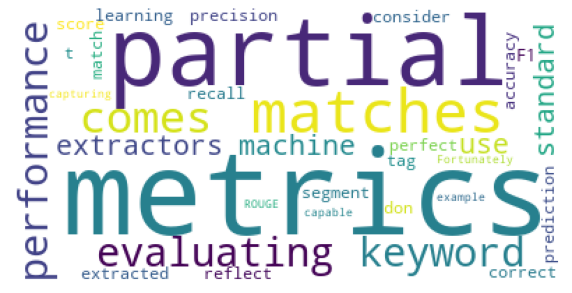

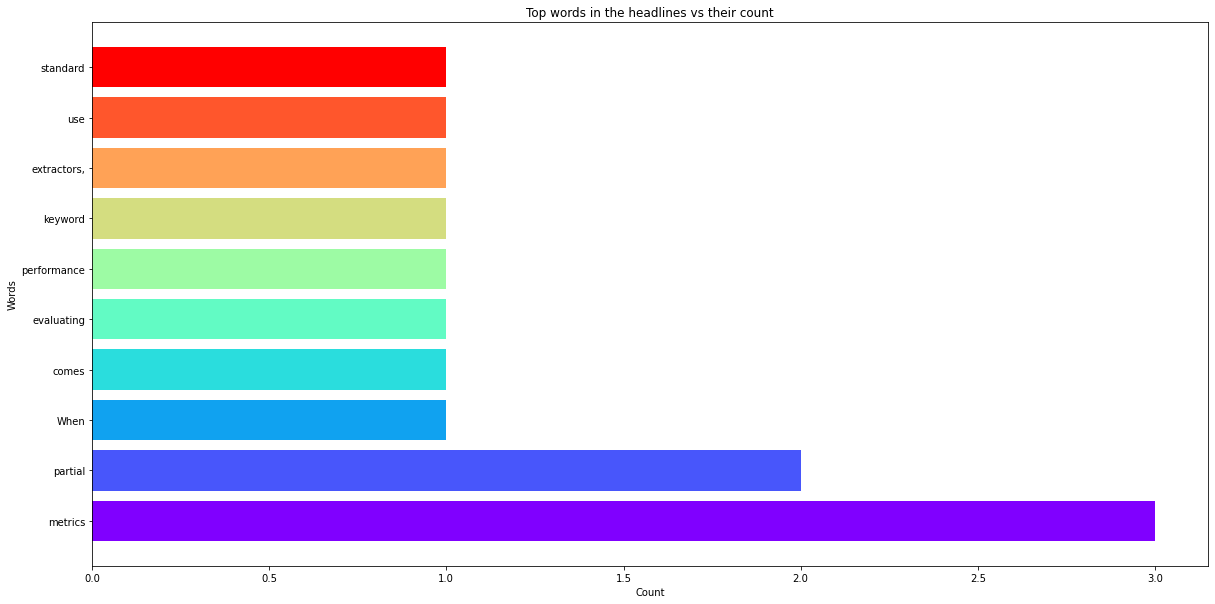

In [19]:
import collections
import numpy as np
import pandas as pd
import matplotlib.cm as cm
import matplotlib.pyplot as plt
from matplotlib import rcParams
from wordcloud import WordCloud, STOPWORDS
all_headlines = """
When it comes to evaluating the performance of keyword extractors, you can use some of the standard metrics in machine learning: accuracy, precision, recall, and F1 score. However, these metrics don’t reflect partial matches; they only consider the perfect match between an extracted segment and the correct prediction for that tag.
Fortunately, there are some other metrics capable of capturing partial matches. An example of this is ROUGE.
"""
stopwords = STOPWORDS
wordcloud = WordCloud(stopwords=stopwords, background_color="white", max_words=1000).generate(all_headlines)
rcParams['figure.figsize'] = 10, 20
plt.imshow(wordcloud)
plt.axis("off")
plt.show()
filtered_words = [word for word in all_headlines.split() if word not in stopwords]
counted_words = collections.Counter(filtered_words)
words = []
counts = []
for letter, count in counted_words.most_common(10):
    words.append(letter)
    counts.append(count)
colors = cm.rainbow(np.linspace(0, 1, 10))
rcParams['figure.figsize'] = 20, 10
plt.title('Top words in the headlines vs their count')
plt.xlabel('Count')
plt.ylabel('Words')
plt.barh(words, counts, color=colors)
plt.show()